# DS 241 Project 2024

## Group Members:
Tiaan Viviers $25070401$

Abraham de Villiers $26936844$

Lydia Laubscher $27357570$

In [151]:
# import nessecary libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import chi2_contingency

In [152]:
#import data
df = pd.read_csv('../data/ShopAlot.csv')
#TODO: Delete previous line and uncomment this for submission
#df = pd.read_csv('ShopAlot.csv')

# Problem Statement

## Background:

ShopAlot is a general online store operating across all nine provinces of South Africa. Customers create profiles to make purchases, providing data such as age and province. ShopAlot collects historical data on clients, as well as various "in-store" variables are recorded during each client visit and purchase.

## Objective:

The primary goal of this project is to:
- **Explore and analyze** the provided dataset to understand the factors influencing the total amount spent (`Sales`) by clients.
- **Build a predictive model** to accurately forecast `Sales` based on the available variables.
- **Interpret the significant factors** that influence `Sales` to provide actionable insights.
- **Recommend strategies** for ShopAlot to increase sales and improve customer engagement.

## Importance:

Understanding the drivers behind customer spending is crucial for ShopAlot to:
- Optimize marketing and advertising efforts.
- Personalize customer experiences.
- Potentially make more money.
- Improve customer retention and loyalty programs.

---

# Understanding and Interpretation of variables

1. **`Sales`** *(Dependent Variable)*:
   - **Description**: Total amount spent (in Rand) on each order.
   - **Role**: The target variable we aim to predict and analyze.

2. **`Month`**:
   - **Description**: Calendar month when the purchase was made.
   - **Interpretation**: May help identify seasonal trends or patterns in sales.

3. **`AgeInMonths`**:
   - **Description**: Age of the client in months.
   - **Interpretation**: May correlate with purchasing power or preferences based on life stages.

4. **`ProfileInMonths`**:
   - **Description**: Duration (in months) since the user created their profile.
   - **Interpretation**: May indicate customer loyalty or engagement level with ShopAlot.

5. **`Subscribed`**:
   - **Description**: Subscription status to promotional emails, including the specific email list if subscribed.
   - **Interpretation**: Subscribed clients might be easier to reach with marketing campeigns.

6. **`NumPrevOrders`**:
   - **Description**: Number of previous orders placed by the customer.
   - **Interpretation**: May reflect purchasing frequency and loyalty.

7. **`AvgSpend`**:
   - **Description**: Average amount (in Rand) of all previous orders by the customer.
   - **Interpretation**: Indicates typical spending behavior, which may predict future sales.

8. **`POSR (Point-of-Sales Ratio)`**:
   - **Description**: Internal score indicating the client's likelihood to respond to advertising.
   - **Interpretation**: Higher scores suggest greater responsiveness to ads, potentially influencing sales.

9. **`OPR (Order-Purchase Ratio)`**:
   - **Description**: Ratio of the number of purchases to the number of times items were added to the basket.
   - **Interpretation**: Measures purchase intent; higher ratios may indicate decisive purchasing behavior.

10. **`Online`**:
    - **Description**: Time spent (in minutes) on the website before logging off.
    - **Interpretation**: May correlate with customer engagement or likelihood to make larger purchases.

11. **`Discount`**:
    - **Description**: Discount percentage applied to the order (0% to 100%).
    - **Interpretation**: Discounts may incentivise higher spending.

12. **`ShippingOption`**:
    - **Description**: Chosen shipping method for the order.
    - **Interpretation**: Certain shipping options might be associated with higher sales or customer preferences.

13. **`Platform`**:
    - **Description**: Device used by the client (iOS, Android, Computer).
    - **Interpretation**: Device type may influence browsing behavior and purchase amounts.

14. **`Payment`**:
    - **Description**: Payment method selected by the customer.
    - **Interpretation**: Payment preferences could relate to spending habits or trust levels.

15. **`Ad_1`**:
    - **Description**: Indicates if Advertisement 1 was used ("Yes" or "No").
    - **Interpretation**: A social media targeted ad; its usage may impact sales if effective.

16. **`Ad_2`**:
    - **Description**: Indicates if Advertisement 2 was used ("Yes" or "No").
    - **Interpretation**: An on-site "frequently bought together" ad; could encourage additional purchases.

17. **`Ad_3`**:
    - **Description**: Indicates if Advertisement 3 was used ("Yes" or "No").
    - **Interpretation**: A homepage "Hot Products" ad; may attract customer interest in trending items.

18. **`SocialMedia`**:
    - **Description**: Social media channel used to contact the client regarding Ad 1.
    - **Interpretation**: Helps identify which platforms are most effective for marketing efforts.

19. **`ShippingPayment`**:
    - **Description**: Indicates if shipping was free or paid by the client.
    - **Interpretation**: Free shipping might encourage higher sales; important for assessing shipping policies.

20. **`Category`**:
    - **Description**: Primary category of items in the cart.
    - **Interpretation**: Different categories may have varying average order values.

21. **`DayOfWeek`**:
    - **Description**: Day of the week when the client logged on.
    - **Interpretation**: Can reveal purchasing patterns related to weekdays or weekends.

22. **`Province`**:
    - **Description**: Province from which the client logged on.
    - **Interpretation**: Geographic insights; may correlate with regional preferences or economic factors.


# Exploratory Data Analysis

The primary objectives of the EDA process are as follows:

1. **Univariate Analysis: Understanding the Distribution of Variables**:
   - We will analyse the distribution of both numerical and categorical variables.
   - Detect outliers and missing values that may need to be addressed in preprocessing.

2. **Multivariate Analysis: Identify Relationships Between Variables**:
   - We will explore relationships between the target variable (`Sales`) and predictor variables.
   - Detect potential interactions between variables that may influence `Sales`.

3. **Gain prelimanry insights from data**:
   - We will summarize distributions, visualise the data, detect anomalys and explore the data. 
   - These insights will inform the modeling stage of the project.


# 1.  Univariate Analysis:

In [153]:
# retrieve basic information about dataset
print(f"Shape of the dataset: {df.shape}"); print()
df.info()
# Investigate missing values
df.isnull().sum()

Shape of the dataset: (15000, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sales            15000 non-null  float64
 1   Month            15000 non-null  object 
 2   AgeInMonths      15000 non-null  int64  
 3   ProfileInMonths  15000 non-null  int64  
 4   Subscribed       4065 non-null   object 
 5   NumPrevOrders    15000 non-null  int64  
 6   AvgSpend         15000 non-null  float64
 7   POSR             15000 non-null  float64
 8   OPR              15000 non-null  float64
 9   Online           15000 non-null  int64  
 10  Discount         15000 non-null  int64  
 11  ShippingOption   15000 non-null  object 
 12  Platform         15000 non-null  object 
 13  Payment          15000 non-null  object 
 14  Ad_1             15000 non-null  object 
 15  Ad_2             15000 non-null  object 
 16  Ad_3             15000 

Sales                  0
Month                  0
AgeInMonths            0
ProfileInMonths        0
Subscribed         10935
NumPrevOrders          0
AvgSpend               0
POSR                   0
OPR                    0
Online                 0
Discount               0
ShippingOption         0
Platform               0
Payment                0
Ad_1                   0
Ad_2                   0
Ad_3                   0
SocialMedia         9050
ShippingPayment        0
Category               0
DayOfWeek              0
Province               0
dtype: int64

Dataset has contains 15000 values for each column, except for 'Subscribed' and 'SocialMedia' which have missing values.

We will deal with the missing values in the `Data Preprocessing` section.

Dataset contains 9 Numerical variables, 13 Categorical Variables.

In [154]:
#Detect outliers in numeric variables using Z-score:
numeric_columns = df.select_dtypes(include=[np.number]).columns

z_scores = stats.zscore(df[numeric_columns])
threshold = 3
outliers_zscore = (abs(z_scores) > threshold).sum(axis=0)
print(outliers_zscore)

Sales              286
AgeInMonths          0
ProfileInMonths     38
NumPrevOrders        0
AvgSpend           226
POSR                 0
OPR                  0
Online              99
Discount           664
dtype: int64


Using the **Z-score method** with a threshold of 3, we identified the following number of outliers in each numerical variable:

- **Sales** and **Discount** have a significant number of outliers (286 and 664, respectively), indicating that there are extreme values in these variables. This is common in financial data and discounts, where large purchases or high discount percentages might skew the data.
- **AvgSpend** also shows a relatively high number of outliers (226), suggesting that customer spending behavior may vary widely across the dataset.

### Options for Handling Outliers:
1. **Remove Outliers**: For variables where outliers are extreme and may distort analysis.
2. **Cap Outliers**: we can cap outliers at a reasonable value.
3. **Transform Variables**: applying a log or other transformations can help reduce the impact of extreme values while maintaining the integrity of the data.

We will take actionable steps in `Data Preprocessing`

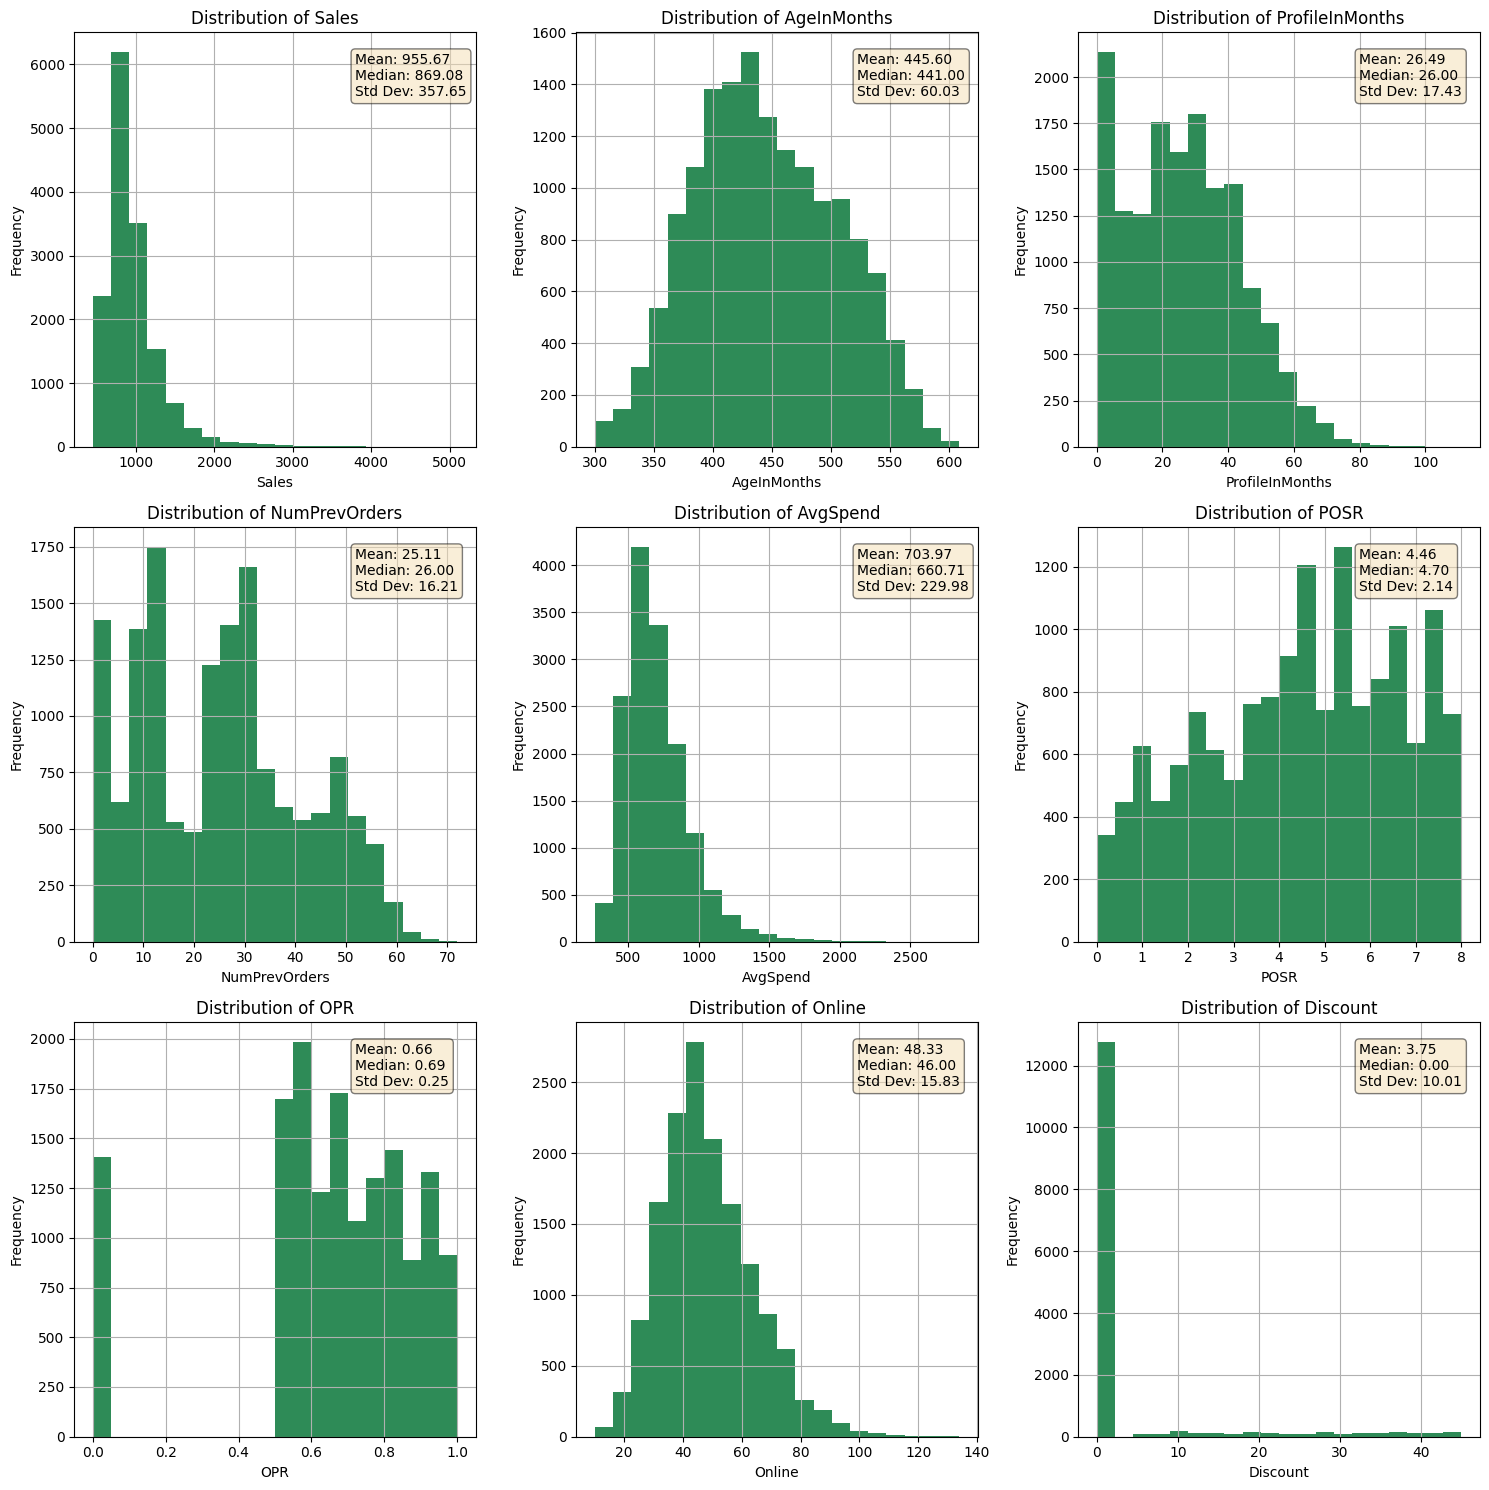

In [155]:
# Visualize distribution of numerical variables
num_vars = len(numeric_columns)
num_cols = 3
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Iterate over each numerical column and plot
for i, col in enumerate(numeric_columns):
    df[col].hist(bins=20, ax=axes[i], color='seagreen')
    
    # Calculate statistics
    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()
    
    # Set titles and labels
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    textstr = '\n'.join((
        f'Mean: {mean:.2f}',
        f'Median: {median:.2f}',
        f'Std Dev: {std:.2f}'))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    
    # Place the box of statistics inside the plot
    axes[i].text(0.7, 0.95, textstr, transform=axes[i].transAxes, fontsize=10,
                 verticalalignment='top', bbox=props)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Sales:
The distribution is right-skewed, with most sales at lower values.
Theres a significant number of smaller sales and fewer instances of high sales.
This suggests that most customers spend small amounts, but few spend significantly more, leading to potential outliers.
#### AgeInMonths:
The distribution is nearly symmetric and centered around ~37 years old.
This indicates a normal distribution for the age of clients, with no significant outliers.
#### ProfileInMonths:
This variable is right-skewed, with many users having recently created profiles.
There are fewer long-term users, which means that ShopAlot has a large number of newer customers.
#### NumPrevOrders:
The distribution shows multiple peaks, suggesting multiple groups of customers.
Most customers have fewer than 20 previous orders, with fewer customers having a large number of past orders.
#### AvgSpend:
Similar to Sales, the distribution is right-skewed, indicating that a small number of customers have a significantly higher average spend.
This may be worth investigating for segmentation of high-value customers.
#### POSR (Point-of-Sales Ratio):
The distribution has multiple peaks, suggesting that different customers may have varying levels of responsiveness to advertisements.
####  OPR (Order-Purchase Ratio):
This distribution clearly has two distinct groups: those with a higher likelihood to complete a purchase after adding items to their basket, and those with a lower likelihood.
####  Online:
The distribution is normal and centered around 45 minutes, meaning most customers spend a reasonable amount of time on the website before logging off.
####  Discount:
Most customers receive no discounts, with very few instances of higher discounts being offered (concentrated near 0%).

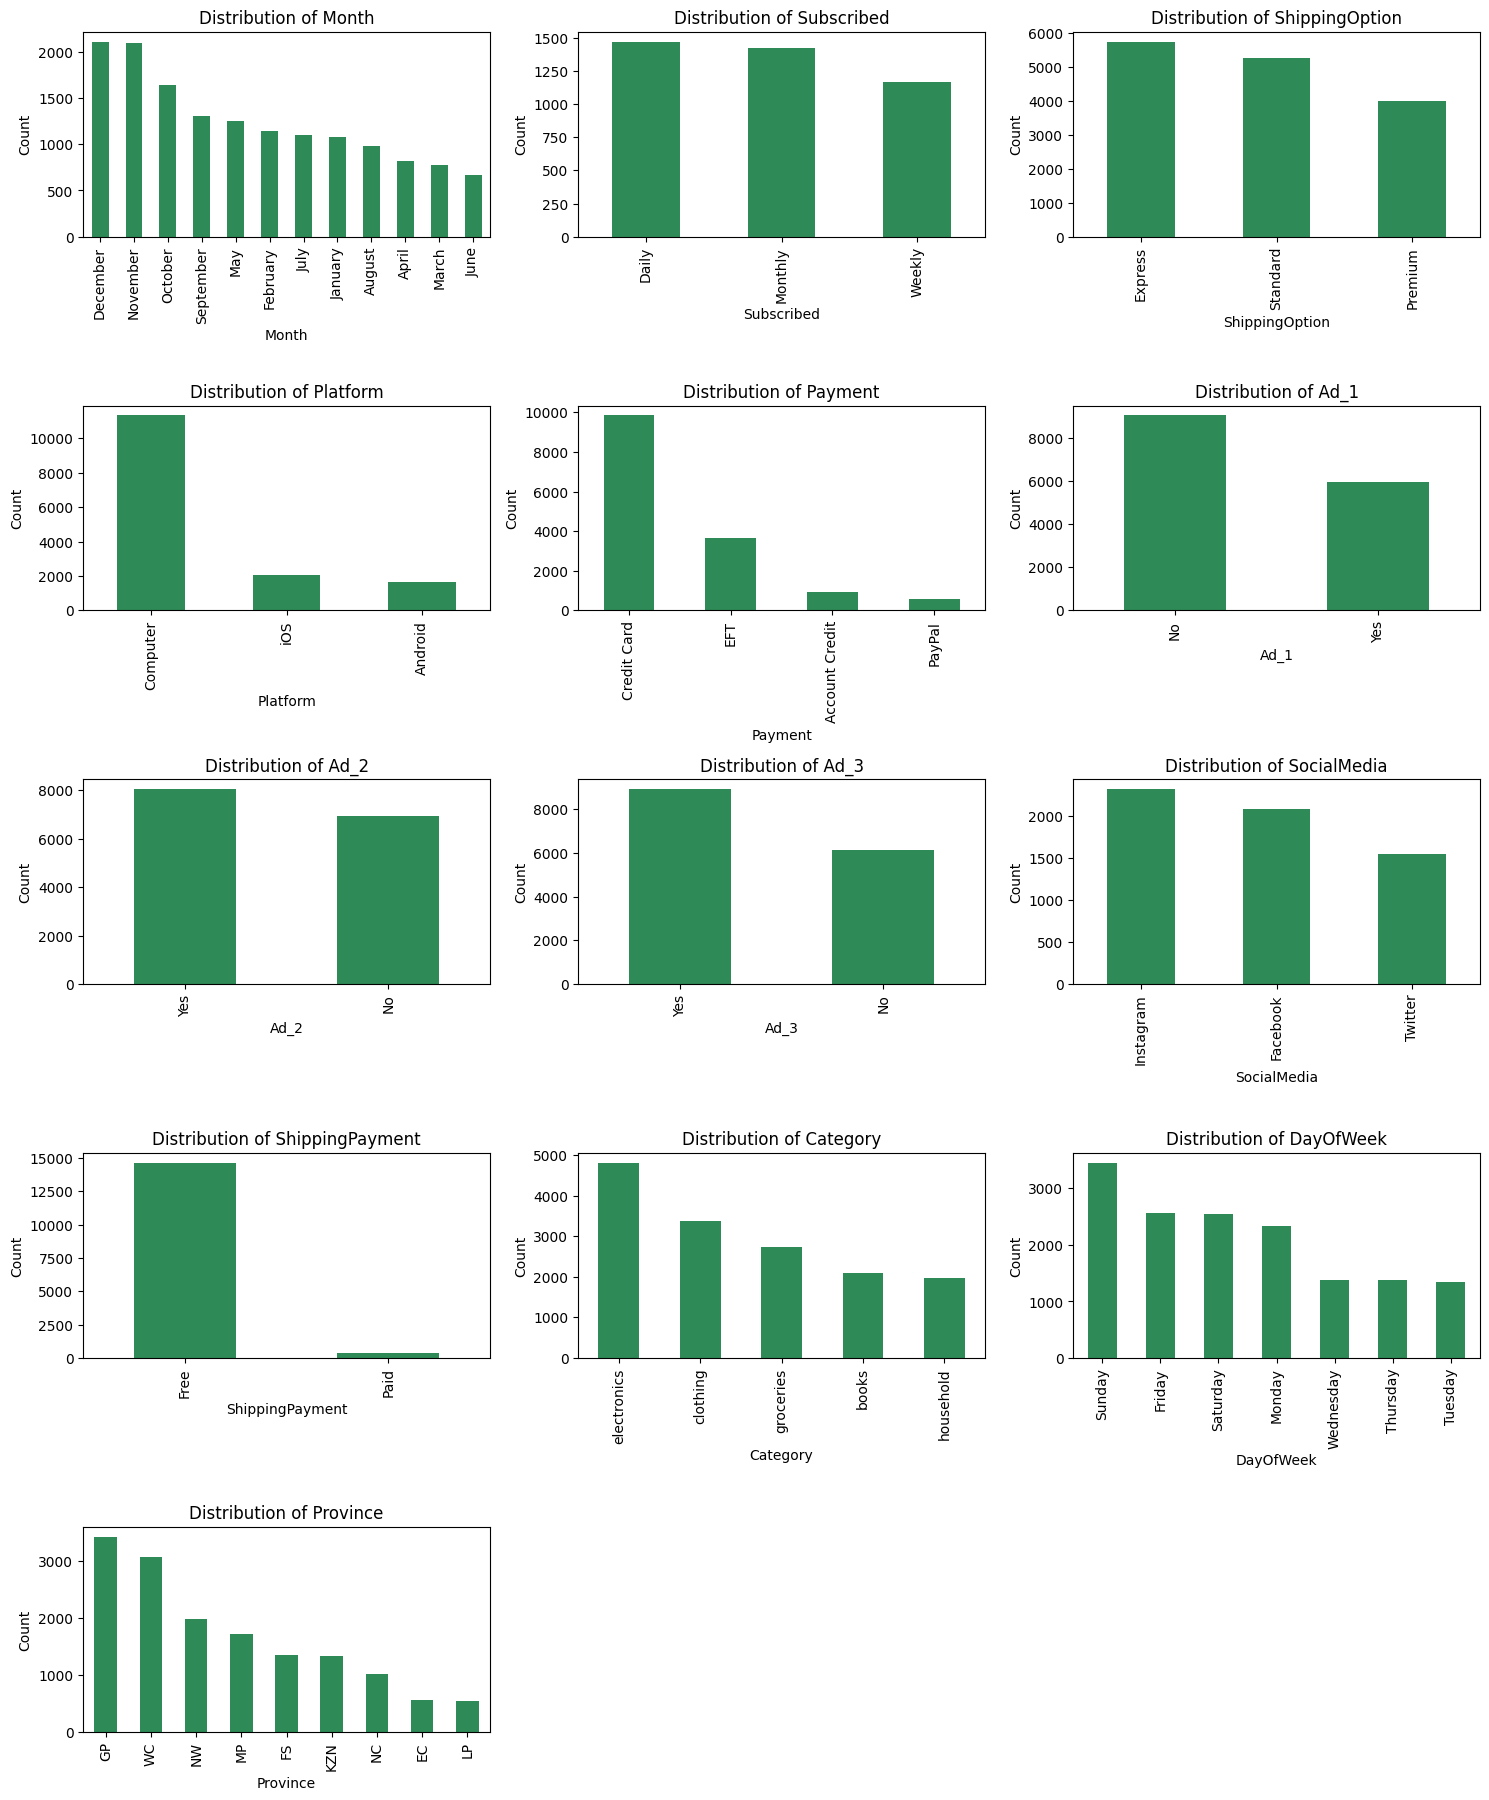

In [156]:
# Visualize distribution of categorical variables
categorical_columns = ['Month', 'Subscribed', 'ShippingOption', 'Platform', 'Payment', 
                       'Ad_1', 'Ad_2', 'Ad_3', 'SocialMedia', 'ShippingPayment', 
                       'Category', 'DayOfWeek', 'Province']

fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 25))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

# Loop through each categorical column and create a bar plot
for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color='seagreen')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)

# Hide any extra subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### Distribution of Month:
There is a clear spike in purchases during the months of December, November, and October. These months have the highest number of transactions, possibly due to holiday seasons or promotional periods like Black Friday.
Implication: ShopAlot experiences a strong seasonality in sales, particularly toward the end of the year.
#### Distribution of Subscribed:
The Daily and Monthly subscription lists have a similar and slightly higher number of customers compared to the Weekly subscription list.
Implication: The majority of customers seem to prefer Daily and Monthly communication.
#### Distribution of ShippingOption:
Express and Standard shipping options are the most popular, with Express being the most selected. The Premium shipping option is less frequently chosen.
Implication: Customers value quicker (Express) shipping options but may be less inclined to pay extra for Premium shipping.
#### Distribution of Platform:
The vast majority of customers use Computer as their platform, with much smaller numbers using iOS and Android devices.
Implication: ShopAlot's website is primarily accessed via desktop, indicating that the desktop user experience should be a key focus.
#### Distribution of Payment:
Credit Card is the most common payment method, followed by EFT. Other payment methods like Account Credit and PayPal are much less frequently used.
Implication: Customers show a clear preference for Credit Card and EFT. Optimizing the payment process for these two methods could improve customer satisfaction.
#### Distribution of Ad_1:
The majority of customers did not interact with Ad_1 (social media targeted ad), with fewer customers exposed to it.
Implication: This suggests that Ad_1 has limited reach. ShopAlot might need to evaluate the effectiveness of this advertisement or consider expanding its visibility to boost its impact on sales.
#### Distribution of Ad_2:
Ad_2 (the "frequently bought together" ad) was shown to more customers than not, with the majority of customers being exposed to this advertisement.
Implication: This ad seems to have good coverage, meaning ShopAlot has the potential to influence purchasing behavior with this recommendation. 
#### Distribution of Ad_3:
Similar to Ad_2, Ad_3 (the "Hot Products" homepage ad) was displayed to more customers than not, with more than half of the customers being shown this advertisement.
Implication: Given its high visibility, Ad_3 might be an important driver of sales for popular or new products.
#### Distribution of SocialMedia:
Instagram is the most frequently used social media channel, followed by Facebook and then Twitter.
Implication: ShopAlot might want to focus more resources on Instagram marketing campaigns or explore why Facebook and Twitter engagement is lower and how to improve it.
#### Distribution of ShippingPayment:
Almost all customers opt for Free shipping, with very few choosing to pay for shipping.
Implication: Free shipping is a key factor in purchasing decisions.
#### Distribution of Category:
Electronics is the most purchased category, followed by Clothing and Groceries. Books and Household items are less frequently purchased.
Implication: Electronics and clothing are strong drivers of sales, and ShopAlot could focus on optimizing their marketing and inventory strategies for these categories.
#### Distribution of DayOfWeek:
Sunday sees the highest number of transactions, followed by Friday and Saturday. Sales during weekdays are generally lower, especially on Tuesday and Thursday.
Implication: There is a clear trend toward increased sales during weekends, particularly on Sundays. ShopAlot could focus marketing efforts on weekends.
#### Distribution of Province:
The majority of customers are from Gauteng, followed by Western Cape and North West. Provinces like Limpopo, Eastern Cape, and Northern Cape have the fewest customers.
Implication: Gauteng and Western Cape are key markets for ShopAlot, and focusing marketing and logistical efforts in these areas could yield the highest return.

## 2. Multivariate Analysis

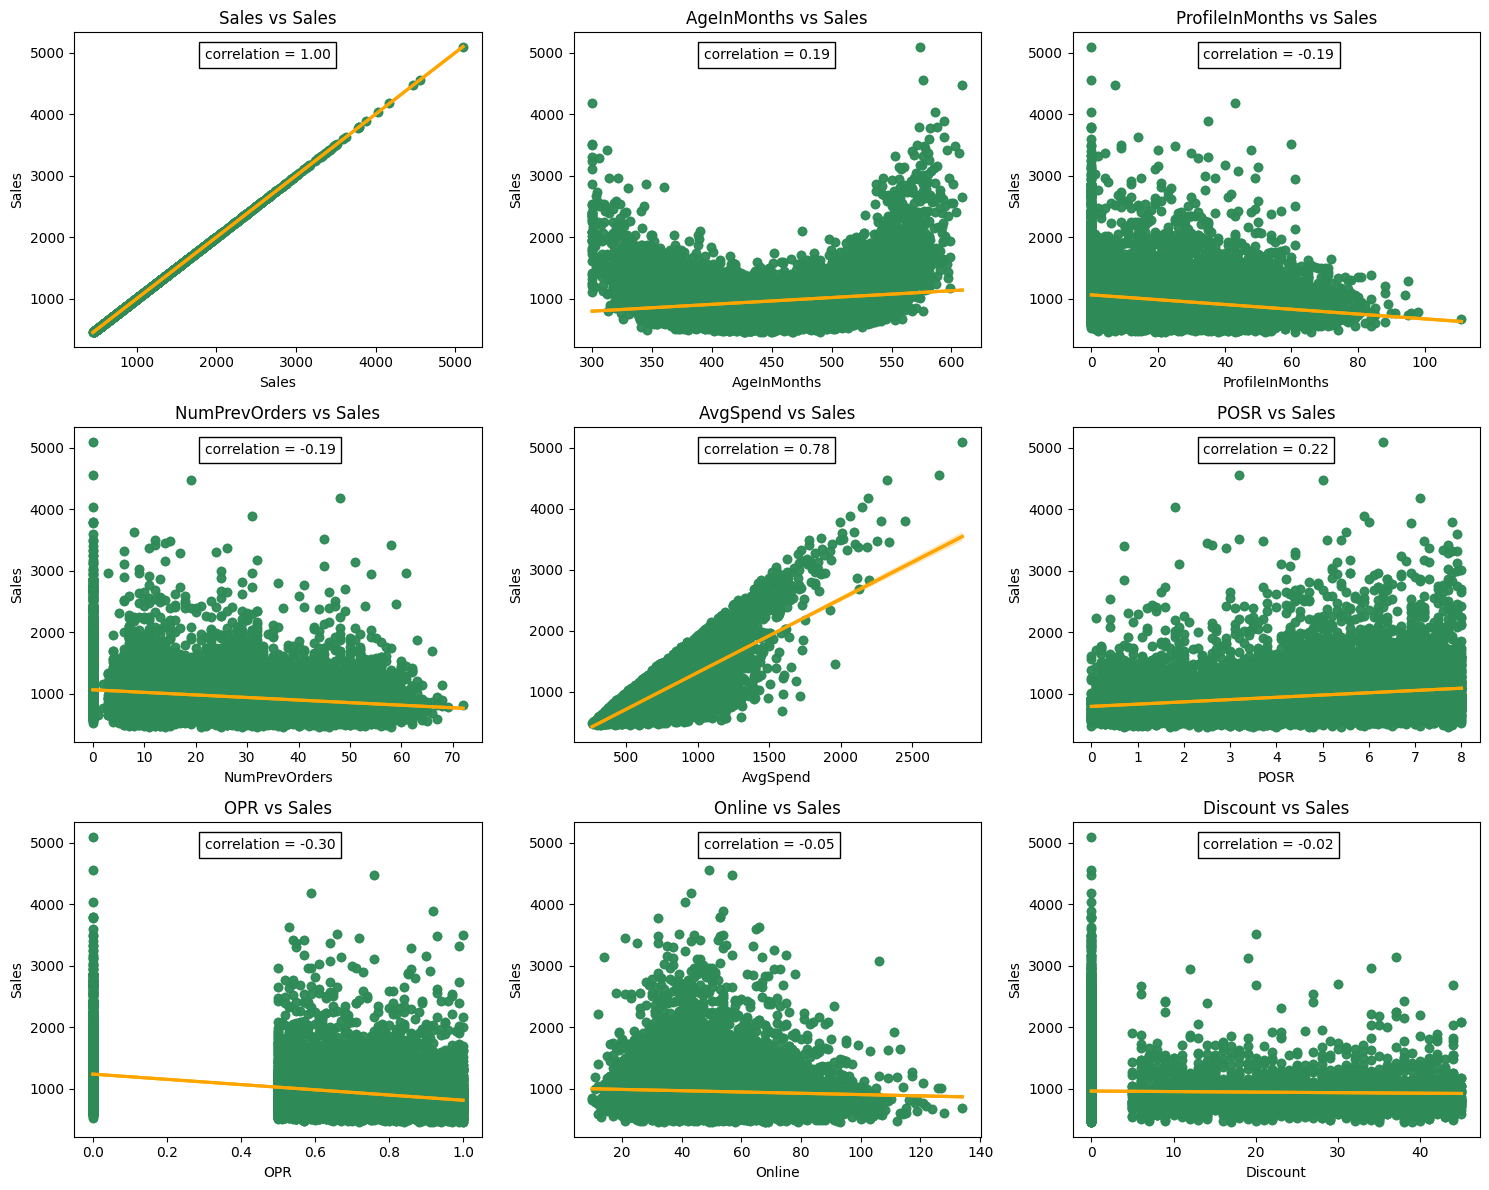

In [157]:
# Define the number of rows and columns for the grid layout
n_cols = 3  # Number of columns
n_rows = (len(numeric_columns) // n_cols) + (len(numeric_columns) % n_cols > 0)  # Calculate number of rows needed

# Create subplots with the defined number of rows and columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))
axes = axes.flatten()  # Flatten the grid for easier indexing

# Loop through each numerical column and create scatter plot with a regression line
for i, col in enumerate(numeric_columns):
    sns.regplot(x=col, y='Sales', data=df, ax=axes[i], scatter_kws={"color": "seagreen"}, line_kws={"color": "orange"})
    axes[i].set_title(f'{col} vs Sales')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Sales')

# Hide any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

for i, col in enumerate(numeric_columns):
    sns.regplot(x=col, y='Sales', data=df, ax=axes[i], scatter_kws={"color": "seagreen"}, line_kws={"color": "orange"})
    axes[i].set_title(f'{col} vs Sales')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Sales')
    
    # Calculate Pearson correlation and display on plot
    corr = df[col].corr(df['Sales'])
    axes[i].text(0.32, 0.95, f'correlation = {corr:.2f}', transform=axes[i].transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white'))
    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### AgeInMonths vs. Sales (Correlation = 0.19):
The relationship between AgeInMonths and Sales appears slightly non-linear, with a parabolic pattern suggesting that very young and very old customers may spend less.
A square root transformation might help linearize this parabolic pattern, potentially improving the relationship and its predictive power.
#### ProfileInMonths vs. Sales (Correlation = -0.19):
The scatter plot shows a weak negative correlation, suggesting that newer customers tend to spend more.
#### NumPrevOrders vs. Sales (Correlation = -0.19):
There is a weak negative correlation, with fewer orders correlating with slightly higher sales. This may reflect that more occasional customers spend more on individual transactions.
#### AvgSpend vs. Sales (Correlation = 0.78):
This variable has a strong positive correlation with sales, meaning that customers who spend more on average are more likely to continue spending more. 
#### POSR vs. Sales (Correlation = 0.22):
Theres a weak positive correlation, suggesting that customers who are more responsive to advertising tend to spend more.
#### OPR vs. Sales (Correlation = -0.30):
The Order-Purchase Ratio shows a moderate negative correlation, suggesting that customers who add items to their cart more often but complete fewer purchases tend to spend less.
#### Online vs. Sales (Correlation = -0.05):
There is essentially no correlation between the time spent online and sales. The points are widely scattered without any clear trend.
#### Discount vs. Sales (Correlation = -0.02):
There is a very weak negative correlation, indicating that discounts don’t have a significant impact on sales. The distribution of Discount is heavily skewed toward 0, as most orders seem to involve no discount.

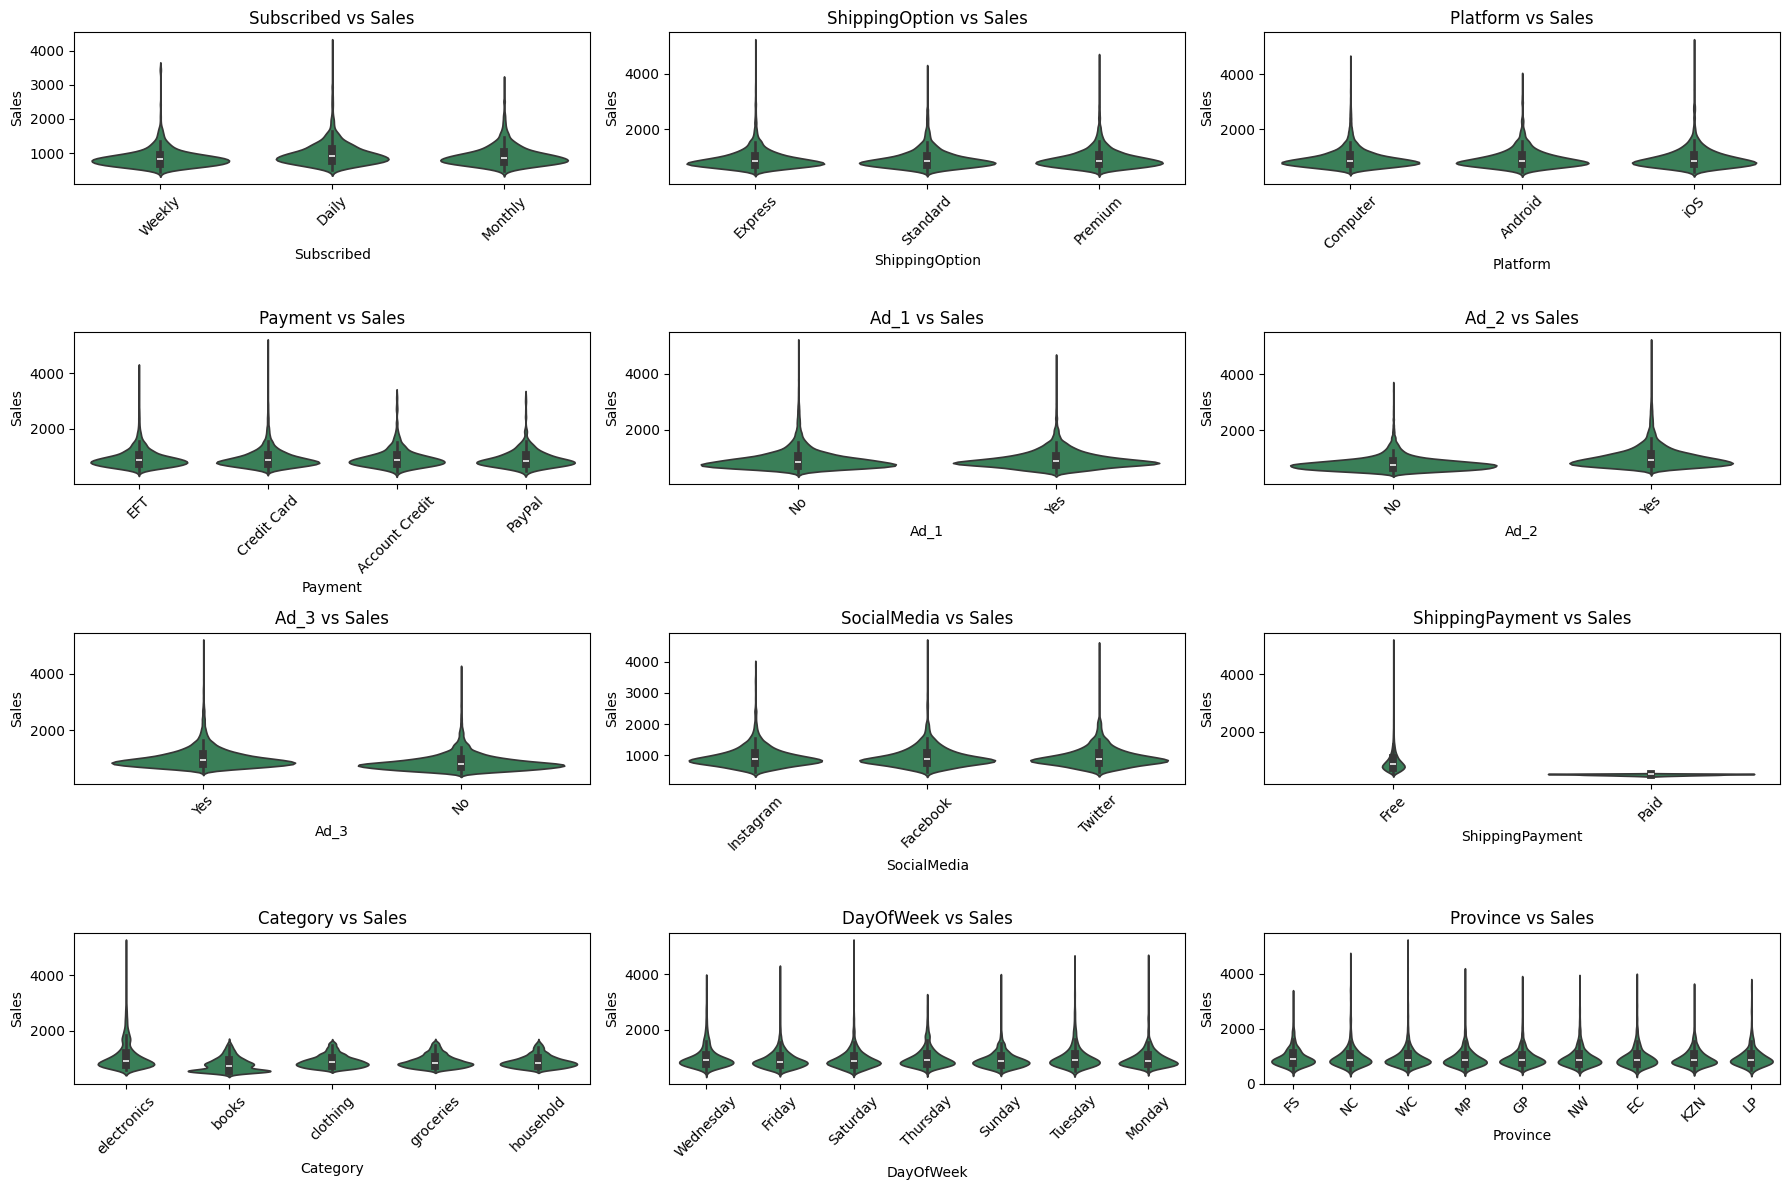

In [158]:
# List of categorical columns
categorical_columns = ['Subscribed', 'ShippingOption', 'Platform', 'Payment', 
                       'Ad_1', 'Ad_2', 'Ad_3', 'SocialMedia', 'ShippingPayment', 
                       'Category', 'DayOfWeek', 'Province']

# Define the number of rows and columns for the grid layout
n_cols = 3  # Number of columns
n_rows = (len(categorical_columns) // n_cols) + (len(categorical_columns) % n_cols > 0)  # Calculate number of rows needed

# Create subplots with the defined number of rows and columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 12))
axes = axes.flatten()  # Flatten the grid for easier indexing

# Loop through each categorical column and create box plot for Sales
for i, col in enumerate(categorical_columns):
    sns.violinplot(x=col, y='Sales', data=df, ax=axes[i], color='seagreen')
    axes[i].set_title(f'{col} vs Sales')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Sales')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Hide any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### Subscribed vs. Sales:
The distribution of sales for customers subscribed to different email frequencies appears very similar.
Implication: Subscribing to promotional emails doesn’t seem to have a significant impact on the amount customers spend.
#### ShippingOption vs. Sales:
Sales distributions are similar across Express, Standard, and Premium shipping options. However, there may be a slight tendency for customers who choose Premium shipping to have slightly higher sales.
Implication: The choice of shipping option doesn't seem to be a strong indicator of spending behavior.
#### Platform vs. Sales:
There is very little variation in sales across platforms (Computer, Android, and iOS), though Computer users may exhibit slightly higher sales.
Implication: Platform type doesn't seem to be a significant driver of sales.
#### Payment vs. Sales:
Customers who use Credit Cards and EFT tend to spend more on average compared to those using Account Credit and PayPal, with Credit Card payments showing slightly higher sales.
Implication: Payment methods do seem to impact spending, with Credit Cards and EFT being associated with higher sales.
#### Ad_1 vs. Sales:
The use of Ad_1 does not show any noticeable difference in the distribution of sales between customers who were exposed to it and those who were not.
Implication: Ad_1 does not appear to influence sales significantly, which suggests that this ad may not be effective in driving spending.
#### Ad_2 vs. Sales:
There’s no big difference in sales distribution for customers who saw Ad_2 and those who didn’t.
Implication: Ad_2 may also not be significantly influencing customer spending.
#### Ad_3 vs. Sales:
As with the other ads, there is no clear difference in sales for customers who were exposed to Ad_3 versus those who weren’t.
Implication: Ad_3 doesn’t seem to drive higher sales either.
#### SocialMedia vs. Sales:
The distribution of sales across Instagram, Facebook, and Twitter is very similar.
Implication: Social media channels don’t seem to significantly affect spending. While Instagram has a larger user base, spending behavior is consistent across platforms.
#### ShippingPayment vs. Sales:
There’s a significant difference between Free and Paid shipping options. Customers who choose Paid shipping have much higher sales, though the number of customers opting for Paid shipping is very small.
Implication: Although most customers opt for Free shipping, those who choose to pay for shipping tend to spend significantly more. ShopAlot could explore offering premium shipping options with added value to promote some higher spending.
#### Category vs. Sales:
Observation: The Electronics category has a noticeably higher distribution of sales compared to other categories like Books, Clothing, and Groceries. Household items have the lowest average sales.
Implication: Electronics drive the highest spending, while other categories like Books and Household may need more attention to boost sales. ShopAlot should focus on optimizing the electronics category for maximum profitability.
#### DayOfWeek vs. Sales:
There’s no significant difference in sales across days of the week, Sunday seems to have slightly higher sales than other days.
Implication: Sunday might be a peak day for spending, but overall, the day of the week doesn’t appear to have a large impact on customer spending. 
#### Province vs. Sales:
Customers in Gauteng and Western Cape seem to have slightly higher sales distributions compared to other provinces.
Implication: ShopAlot's largest provinces, Gauteng and Western Cape, show higher sales, which aligns with their larger populations.

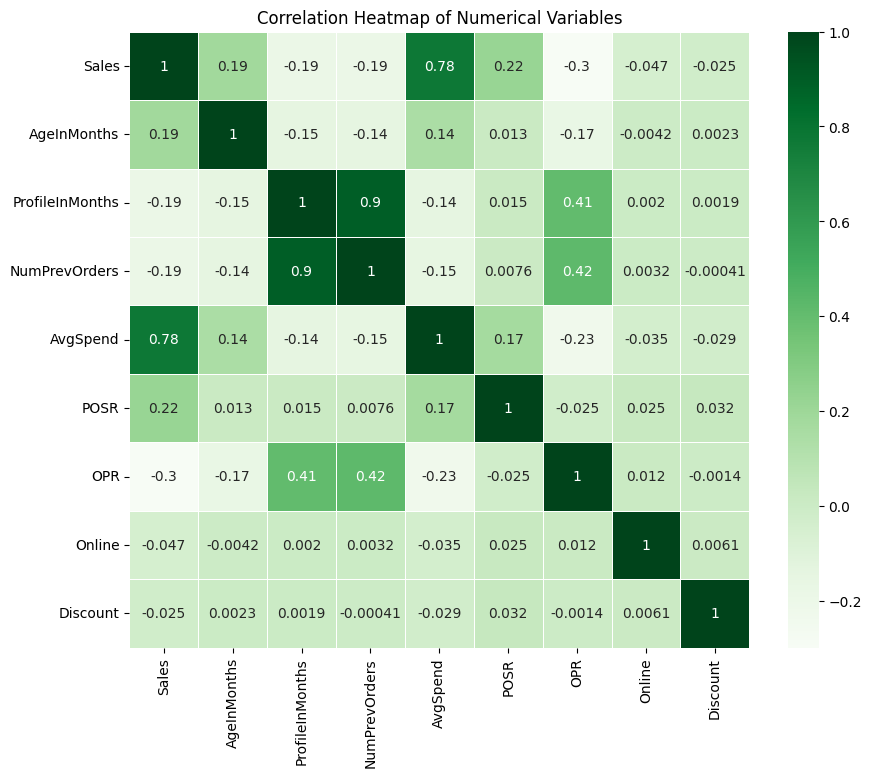

In [159]:
# Correlation heatmap for numerical variables
numeric_df = df.select_dtypes(include=[float, int])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greens', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

#### Strong Correlation:
AvgSpend vs. Sales:
A strong positive correlation of 0.78 indicates that customers who have a higher average spend on previous orders tend to spend more on future orders as well. This is a key predictor of sales.

#### Moderate Correlations:
OPR vs. Sales: There’s a moderate negative correlation of -0.30, meaning that customers with a higher Order-Purchase Ratio tend to spend less.

POSR vs. Sales: A weak positive correlation of 0.22 suggests that customers more responsive to advertising are likely to spend more.

AgeInMonths vs. Sales: A weak positive correlation of 0.19 indicates that older customers tend to spend slightly more.


##### Multicollinearity:
NumPrevOrders vs. ProfileInMonths: A very high correlation of 0.90 shows that the number of previous orders increases as the profile age increases, which makes sense as older profiles are more likely to have placed more orders.

OPR vs. ProfileInMonths and OPR vs. NumPrevOrders: Both show a correlation of around 0.40, indicating that customers with older profiles or more previous orders tend to have higher OPR (Order-Purchase Ratio).

#### Weak or No Correlation:
Variables such as Online time, Discount, and AgeInMonths show almost no significant correlation with Sales, indicating they are unlikely to be important predictors for modeling sales.
Discount has a very weak negative correlation with sales (-0.02), suggesting that discounts don’t have a major impact on the amount spent.

#### Implications:
AvgSpend stands out as a strong predictor for Sales, and should likely be a key feature in any predictive model.

The multicollinearity between ProfileInMonths and NumPrevOrders suggests that one of these may need to be dropped or handled during modeling to avoid redundancy.

Features like Online time and Discount might not contribute significantly to the predictive model for sales, so they could be excluded. We will touch on this again in stepwise selection of the model variables.

# Data Preporcessing

### Handle Missing Values:

In [160]:
# Fill missing values for Subscribed and SocialMedia
df['Subscribed'] = df['Subscribed'].fillna('Not Subscribed')
df['SocialMedia'] = df['SocialMedia'].fillna('None')

### Handle outliers:
- Sales: 286
- ProfileInMonths: 38
- AvgSpend: 226
- Online: 99
- Discount: 664

In [161]:
# Capping outliers at the 95th percentile
variables_to_cap = ['ProfileInMonths', 'Online', 'Discount']
for var in variables_to_cap:
    upper_limit = df[var].quantile(0.95)
    df[var] = df[var].clip(upper=upper_limit)

### Interaction Terms:

In [162]:
df['Discount_AvgSpend'] = df['Discount'] * df['AvgSpend']

### Transformations

In [163]:
# Apply square root transformation
df['Sqrt_AgeInMonths'] = np.sqrt(df['AgeInMonths'])

### Dummy Variable Encoding

In [164]:
dummies = pd.get_dummies(
    df,
    columns=['Subscribed',
             'ShippingOption',
             'Platform',
             'Payment',
             'Ad_1',
             'Ad_2',
             'Ad_3',
             'SocialMedia',
             'ShippingPayment',
             'Category',
             'DayOfWeek',
             'Province'],
    drop_first=True)

# Mapping Month to Season and adding Season dummies
season_mapping = {
    'January': 'Summer',
    'February': 'Summer',
    'March': 'Autumn',
    'April': 'Autumn',
    'May': 'Autumn',
    'June': 'Winter',
    'July': 'Winter',
    'August': 'Winter',
    'September': 'Spring',
    'October': 'Spring',
    'November': 'Spring',
    'December': 'Summer'
}

# Map Season and create dummies
dummies['Season'] = dummies['Month'].map(season_mapping)
season_dummies = pd.get_dummies(dummies['Season'])
dummies = pd.concat([dummies, season_dummies], axis=1)
dummies.drop(['Month', 'Season'], axis=1, inplace=True)
# Ensure boolean columns are converted to integers
dummies[dummies.select_dtypes(include='bool').columns] = dummies.select_dtypes(include='bool').astype(int)

### Train-Test-Split and Variable Setup

In [165]:
# Drop the original AgeInMonths column since we using the transformed Sqrt_AgeInMonths
dummies.drop(['AgeInMonths'], axis=1, inplace=True)

x = dummies.drop(columns=['Sales'])
y = dummies['Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

## Preprocessing Changes Documentation
#### Missing Values:
In our dataset, we identified missing values in the Subscribed and SocialMedia columns. Since both are categorical variables, we opted to handle the missing values by filling them with appropriate categories that make sense based on the context.
- `Subscribed`: We filled missing values with "Not Subscribed". We assumed that if a customers subscription status is missing, they are not subscribed to any promotional emails. This ensures that the missing values are handled in a way that preserves the categorical nature of the variable and aligns with business logic.
- `SocialMedia`: We filled missing values with "None", indicating that customers were not contacted via any social media platform. This choice ensures that we capture the customers who were not influenced by social media.

#### Handling of Outliers:
To ensure that outliers don’t disproportionately affect the model while preserving meaningful information, we chose to apply capping at the 95th percentile for 3 variables.
- `Variables Capped`: `ProfileInMonths`, `Online`, and `Discount` were capped. By capping these variables, we maintain the integrity of the data while mitigating the potential distortion caused by outliers.
- `Variables not Altered`:
- - `Sales`: Outliers in sales likely represent high-value transactions or important customer segments that could provide valuable insights.
  - `AvgSpend`: High average spenders could represent premium customers. We believe there is valeuble insights in this data.


#### Interaction terms:
`Discount_AvgSpend`:AvgSpend was identified as one of the strongest predictors of Sales during our EDA (with a correlation of 0.78). By interacting it with Discount, we aim to capture the potential impact of discounts on customers who tend to spend more on average. This interaction can help reveal whether high-value and low-value customers are more or less influenced by discounts.

We opted not to create additional interaction terms because the dataset already contains more than 40 columns after dummy encoding, which could introduce unnecessary complexity.

#### Transformations:
During the Exploratory Data Analysis (EDA), we observed that AgeInMonths exhibited a parabolic relationship with Sales, which indicated a non-linear pattern. To linearise this relationship and make it easier for the model to capture, we applied a square root transformation. We feel that the need for a transformation on other variables is not needed as it would either not provide major benefits or the variable is not strongly correlated with sales.

#### Dummy Encoding:
The following categorical variables were encoded:
`Subscribed`, `ShippingOption`, `Platform`, `Payment`, `Ad_1`, `Ad_2`, `Ad_3`, `SocialMedia`, `Shipping`, `PaymentCategory`, `DayOfWeek`, `Province`.
Additionally, we mapped the Month variable into seasons (`Summer`, `Autumn`, `Winter`, `Spring`).

#### Train Test Split:
We opted for a classic 75/25 train-test split. We feel there is enough training data in 75% of the original data frame that we can have a slightly bigger testing set at around 25%, rather than the usual 20% or 10%

# Linear regression analysis

### Initial model build (ordinary least squares)

In [166]:
x_train_sm = sm.add_constant(x_train)
initial_model = sm.OLS(y_train, x_train_sm).fit()

initial_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     522.0
Date:                Sat, 05 Oct 2024   Prob (F-statistic):               0.00
Time:                        10:01:00   Log-Likelihood:                -75654.
No. Observations:               11250   AIC:                         1.514e+05
Df Residuals:                   11203   BIC:                         1.517e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -46.5022     20.899     -2.225      0.026     -87.468      -5.536
ProfileInMonths              -1.1840      0.280     -4.227      0.000      -1.733      -0.635
NumPrevOrders                 0.1796      0.286      0.629      0.529      -0.380       0.739
AvgSpend                      0.9916      0.010    100.881      0.000       0.972       1.011
POSR                          9.3399      1.043      8.952      0.000       7.295      11.385
OPR                        -175.5144      8.684    -20.212      0.000    -192.536    -158.493
Online                       -0.7838      0.132     -5.923      0.000      -1.043      -0.524
Discount                      1.2508      0.728      1.717      0.086      -0.177       2.679
Discount_AvgSpend            -0.0025      0.001     -2.448      0.014      -0.004      -0.000
Sqrt_AgeInMonths             13.2524      1.377      9.623      0.000      10.553      15.952
Subscribed_Monthly           -8.9110      8.930     -0.998      0.318     -26.416       8.594
Subscribed_Not Subscribed    -9.5661      7.038     -1.359      0.174     -23.361       4.229
Subscribed_Weekly             7.9242      9.816      0.807      0.420     -11.317      27.165
ShippingOption_Premium       12.1989      4.808      2.537      0.011       2.774      21.624
ShippingOption_Standard       1.4459      4.548      0.318      0.751      -7.468      10.360
Platform_Computer             0.6967      6.131      0.114      0.910     -11.321      12.715
Platform_iOS                  9.5917      7.704      1.245      0.213      -5.509      24.692
Payment_Credit Card          13.3049      8.128      1.637      0.102      -2.627      29.237
Payment_EFT                  13.8605      8.668      1.599      0.110      -3.131      30.852
Payment_PayPal              -15.1407     12.675     -1.195      0.232     -39.985       9.704
Ad_1_Yes                     11.0993     11.019      1.007      0.314     -10.499      32.698
Ad_2_Yes                    143.7662      4.910     29.280      0.000     134.142     153.391
Ad_3_Yes                    121.2744      4.424     27.413      0.000     112.603     129.946
SocialMedia_Instagram         8.0451      7.028      1.145      0.252      -5.732      21.822
SocialMedia_None            -57.6015     10.678     -5.395      0.000     -78.532     -36.672
SocialMedia_Twitter          -7.6016      7.858     -0.967      0.333     -23.004       7.801
ShippingPayment_Paid         -7.6587     13.704     -0.559      0.576     -34.521      19.204
Category_clothing             4.6124      7.376      0.625      0.532      -9.846      19.071
Category_electronics         76.4796      7.059     10.835      0.000      62.643      90.316
Category_groceries           11.8869      7.834      1.517      0.129      

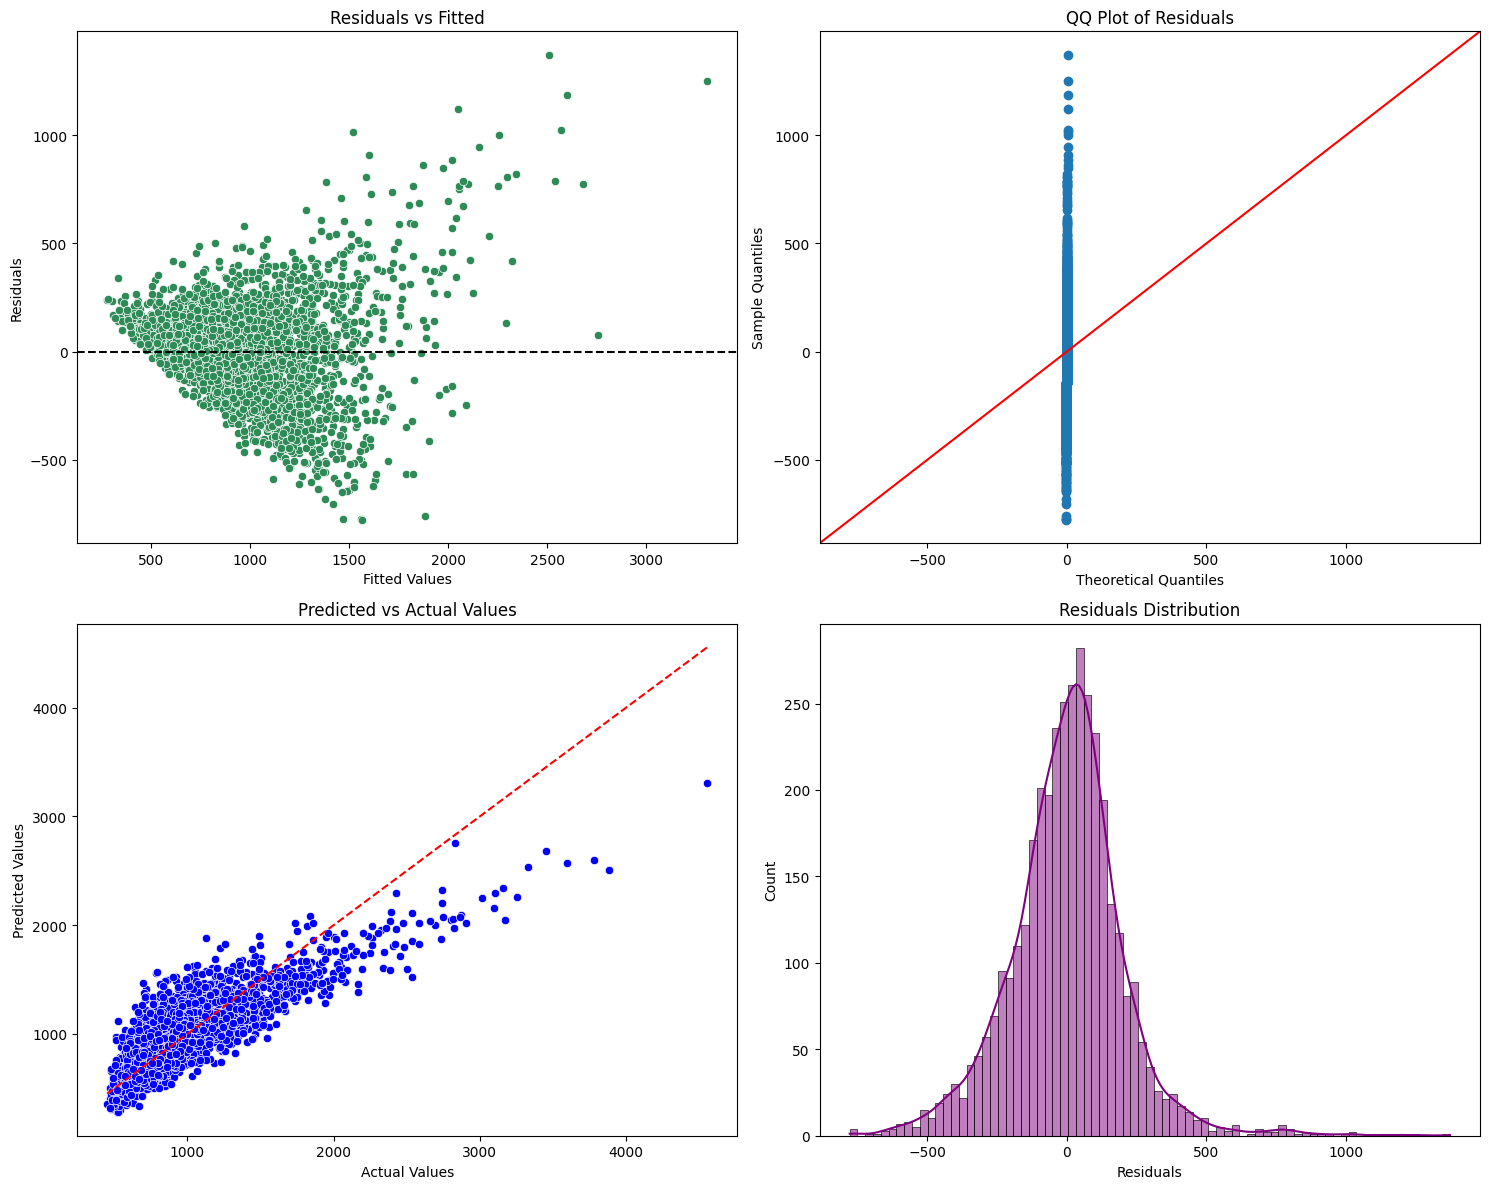

In [167]:
# Predicted values and residuals
y_pred = initial_model.predict(sm.add_constant(x_test))
residuals = y_test - y_pred

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Residuals vs. Fitted Values
sns.scatterplot(x=y_pred, y=residuals, ax=axes[0, 0], color='seagreen')
axes[0, 0].axhline(0, linestyle='--', color='black')
axes[0, 0].set_title('Residuals vs Fitted')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')

# Plot 2: QQ Plot of residuals
sm.qqplot(residuals, line='45', ax=axes[0, 1])
axes[0, 1].set_title('QQ Plot of Residuals')

# Plot 3: Predicted vs Actual Values
sns.scatterplot(x=y_test, y=y_pred, ax=axes[1, 0], color='blue')
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
axes[1, 0].set_title('Predicted vs Actual Values')
axes[1, 0].set_xlabel('Actual Values')
axes[1, 0].set_ylabel('Predicted Values')

# Plot 4: Residual Histogram
sns.histplot(residuals, kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Residuals Distribution')
axes[1, 1].set_xlabel('Residuals')

plt.tight_layout()
plt.show()

### Forward stepwise selection

In [168]:
def fss(x, y, significance_lvl=0.05):
    initial_features = x.columns.tolist()
    selected_features = []
    r_squared_values = []
    
    while len(initial_features) > 0:
        pvals = pd.Series(index=initial_features)
        
        for feature in initial_features:
            model = sm.OLS(y, sm.add_constant(x[selected_features + [feature]])).fit()
            pvals[feature] = model.pvalues[feature]
            
        best_feature = pvals.idxmin()
        best_pvalue = pvals.min()
        
        if best_pvalue < significance_lvl:
            selected_features.append(best_feature)    
            initial_features.remove(best_feature)
            
            r_squared_values.append(model.rsquared)
            
            print(f"Selected {best_feature} with p-value {best_pvalue}")
        else:
            # No further improvements can be made to the model
            break
    
    # Plotting R²
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(r_squared_values) + 1), r_squared_values, marker='o', color='blue', label='R² Value')
    plt.title('R² Value vs. Number of Variables Added')
    plt.xlabel('Number of Variables')
    plt.ylabel('R² Value')
    plt.xticks(range(1, len(r_squared_values) + 1))
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

    return selected_features

Selected AvgSpend with p-value 0.0
Selected Ad_2_Yes with p-value 3.6647970458417586e-110
Selected Ad_3_Yes with p-value 2.8976823721072e-128
Selected OPR with p-value 1.229289743386186e-119
Selected Category_electronics with p-value 6.235437428709562e-64
Selected SocialMedia_None with p-value 1.6935985280294058e-55
Selected Ad_1_Yes with p-value 6.369360300466398e-146
Selected Sqrt_AgeInMonths with p-value 1.1302250890489185e-24
Selected POSR with p-value 3.9058629091172033e-19
Selected ProfileInMonths with p-value 2.707629668294296e-13
Selected Online with p-value 2.5475216571265034e-09
Selected ShippingOption_Premium with p-value 0.0015535174925410443
Selected Payment_PayPal with p-value 0.007620009449670952
Selected Discount_AvgSpend with p-value 0.008326768776919064
Selected Subscribed_Weekly with p-value 0.03446420401745901
Selected Province_NC with p-value 0.03601865117780381
Selected Province_FS with p-value 0.024213405435872214


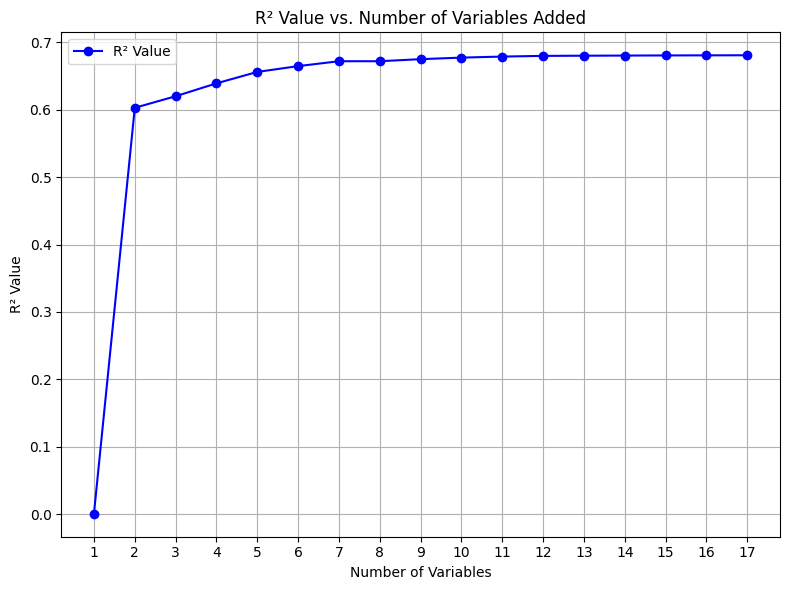

In [169]:
selected_features = fss(x_train, y_train)

## Multicolinearity Detection and handling:

In [170]:
def calculate_vif(X):
    """Calculate VIF for each feature in the dataset."""
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Assuming 'x_train' contains your selected features
x_train_selected = x_train[selected_features]  # 'selected_features' from your forward selection

# Add constant for intercept (if required)
x_train_selected = sm.add_constant(x_train_selected)

# Calculate VIF
vif_df = calculate_vif(x_train_selected)

# Display VIF values
print(vif_df)

                   Feature       VIF
0                    const  0.000000
1                 AvgSpend  1.274952
2                 Ad_2_Yes  1.576282
3                 Ad_3_Yes  1.221103
4                      OPR  1.309566
5     Category_electronics  1.050065
6         SocialMedia_None       inf
7                 Ad_1_Yes       inf
8         Sqrt_AgeInMonths  1.045261
9                     POSR  1.326556
10         ProfileInMonths  1.260899
11                  Online  1.029164
12  ShippingOption_Premium  1.022890
13          Payment_PayPal  1.001294
14       Discount_AvgSpend  1.032847
15       Subscribed_Weekly  1.103702
16             Province_NC  1.008024
17             Province_FS  1.007813


C:\Users\tiaan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\tiaan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [171]:
# Remove SocialMedia_None and recalculate VIF
x_train_selected = x_train_selected.drop(columns=['SocialMedia_None'])
vif_df = calculate_vif(x_train_selected)

# Display the new VIF values
print(vif_df)

                   Feature         VIF
0                    const  273.110319
1                 AvgSpend    1.274952
2                 Ad_2_Yes    1.576282
3                 Ad_3_Yes    1.221103
4                      OPR    1.309566
5     Category_electronics    1.050065
6                 Ad_1_Yes    1.141593
7         Sqrt_AgeInMonths    1.045261
8                     POSR    1.326556
9          ProfileInMonths    1.260899
10                  Online    1.029164
11  ShippingOption_Premium    1.022890
12          Payment_PayPal    1.001294
13       Discount_AvgSpend    1.032847
14       Subscribed_Weekly    1.103702
15             Province_NC    1.008024
16             Province_FS    1.007813


In [172]:
# Try linear model with selected features and without multicolinear terms:
fss_model = sm.OLS(y_train, sm.add_constant(x_train[selected_features])).fit()

print(fss_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1498.
Date:                Sat, 05 Oct 2024   Prob (F-statistic):               0.00
Time:                        10:01:05   Log-Likelihood:                -75673.
No. Observations:               11250   AIC:                         1.514e+05
Df Residuals:                   11233   BIC:                         1.515e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -37

### Summary Comparison of 2 OLS Models

#### 1. **Full Model**
- **R-squared**: 0.683
- **Adjusted R-squared**: 0.682
- **F-statistic**: 548.3
- **AIC**: 151400
- **BIC**: 151700
- **Number of Predictors (Df Model)**: 44
- **Log-Likelihood**: -75638

The full model includes all **44 predictors** and explains 68.3% of the variance in sales (R-squared). The **AIC** and **BIC** are the highest of all the models, indicating that the complexity of the model may not be justified by significantly better performance.

#### 2. **Forward Stepwise Selection**
- **R-squared**: 0.682
- **Adjusted R-squared**: 0.682
- **F-statistic**: 1505
- **AIC**: 151300
- **BIC**: 151500
- **Number of Predictors (Df Model)**: 16
- **Log-Likelihood**: -75653

The forward stepwise model retains **16 predictors**, resulting in an R-squared of **0.682**, very similar to the full model. The model has slightly better **AIC (151300)** and **BIC (151500)** values, indicating improved performance with fewer predictors. The high F-statistic (**1505**) suggests that the retained variables are highly significant.

### Conclusion
- **Full Model**: The full model has a marginally higher R-squared (0.683) but includes 44 predictors, making it the most complex and resulting in the highest AIC and BIC values.
- **Forward Stepwise**: This model reduces the number of predictors to **16**, while maintaining nearly the same R-squared of 0.682. It shows the best F-statistic, AIC, and BIC, suggesting that it strikes the best balance between model simplicity and performance.
- **Backward Stepwise**: This model retains **17 predictors** and offers nearly identical performance to the forward stepwise model, but with one additional variable and a slightly lower F-statistic.

Both the forward and backward stepwise models offer more efficient models with fewer predictors, and they should be preferred over the full model. The forward stepwise model has a slight edge in terms of performance metrics.

## Significant variables

So far we can consider the following variables as significant since forward stepwise selection yielded the best result:

In [173]:
for var in x_train_selected:
    print(var)

const
AvgSpend
Ad_2_Yes
Ad_3_Yes
OPR
Category_electronics
Ad_1_Yes
Sqrt_AgeInMonths
POSR
ProfileInMonths
Online
ShippingOption_Premium
Payment_PayPal
Discount_AvgSpend
Subscribed_Weekly
Province_NC
Province_FS


In [174]:
selected_features = [
    'AvgSpend',
    'Ad_2_Yes',
    'Ad_3_Yes',
    'OPR',
    'Category_electronics',
    'Ad_1_Yes',
    'Sqrt_AgeInMonths',
    'POSR',
    'ProfileInMonths',
    'Online',
    'ShippingOption_Premium',
    'Payment_PayPal',
    'Discount_AvgSpend',
    'Subscribed_Weekly',
    'Province_NC',
    'Province_FS'
]

x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

## Polynomial Regression

Degree: 1 
| Train MSE: 40741.9603 | Test MSE: 41057.7803 
| Train R²: 0.6809 | Test R²: 0.6807

Degree: 2 
| Train MSE: 17372.1126 | Test MSE: 16886.3270 
| Train R²: 0.8639 | Test R²: 0.8687

Degree: 3 
| Train MSE: 13678.8004 | Test MSE: 15797.9029 
| Train R²: 0.8928 | Test R²: 0.8771

Degree: 4 
| Train MSE: 12773.0233 | Test MSE: 53192.7583 
| Train R²: 0.8999 | Test R²: 0.5863



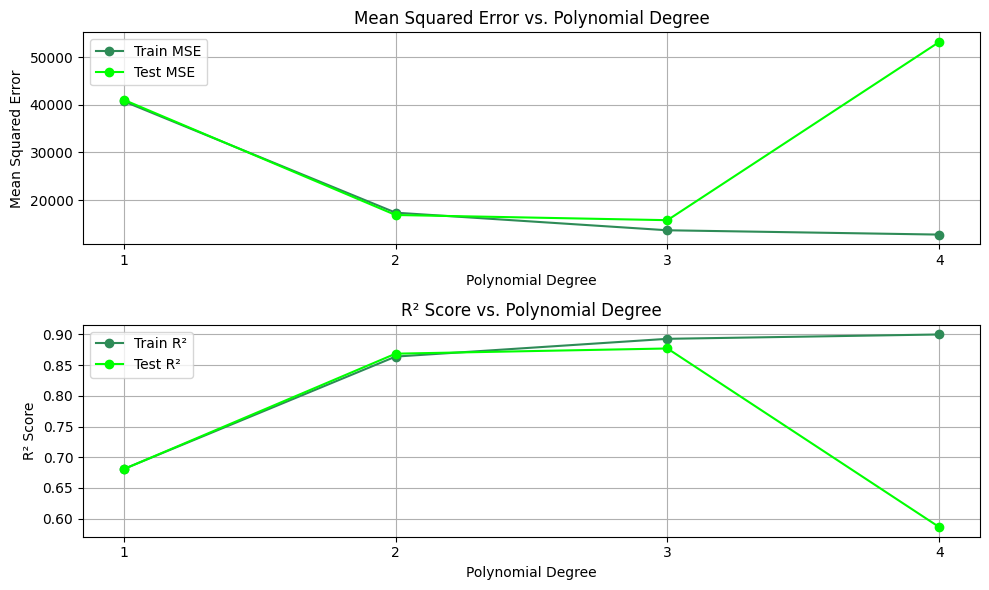

In [175]:
# Evaluate polynomial regression for different degrees
degrees = [1, 2, 3, 4]
train_errors = []
test_errors = []
train_r2_scores = []
test_r2_scores = []

for degree in degrees:

    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train_selected)
    x_test_poly = poly.transform(x_test_selected)

    # Fit the model
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Predict
    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)

    # Calculate MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)
    
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

    print(f'Degree: {degree} \n| Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f} \n| Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}\n')

# Plotting MSE
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(degrees, train_errors, marker='o', label='Train MSE', color='seagreen')
plt.plot(degrees, test_errors, marker='o', label='Test MSE', color='lime')
plt.title('Mean Squared Error vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.grid()
plt.legend()

# Plotting R² Scores
plt.subplot(2, 1, 2)
plt.plot(degrees, train_r2_scores, marker='o', label='Train R²', color='seagreen')
plt.plot(degrees, test_r2_scores, marker='o', label='Test R²', color='lime')
plt.title('R² Score vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.xticks(degrees)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
